In [1]:
import pandas as pd
from Bio.PDB import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patheffects as PathEffects
from adjustText import adjust_text

import matplotlib_venn

In [2]:
# Load the mutation data and the mutation database
mutationdata = pd.read_csv("../Data/Structure_data/FH_complete_mutation_summary.csv")
mutation_database = pd.read_csv("../Data/Mutations_database/FH_mutations_missense_categories.csv")

In [3]:
# Make a set of the LOF mutations in the database
mutation_database_LOF = mutation_database[mutation_database["Category"] == "LOF"]
mutation_database_LOF_mutations = set(mutation_database_LOF["Mutation"])

In [4]:
# Make a set of binding site associated mutations
bindingsite_mutations = mutationdata[mutationdata["Mindist_bindingsiteA"] <= 6]
bindingsite_mutations_set = set(bindingsite_mutations["Mutation"])

In [5]:
# Make a set of hinge associated mutations
hinge_mutations = mutationdata[mutationdata["Mindist_hinge"] <= 6]
hinge_mutations_set = set(hinge_mutations["Mutation"])

In [6]:
# Get buried (RSA <.2) and destabilizing mutations
buried_mutations = mutationdata[mutationdata["RSA"] <= 0.2]
buried_mutations_highenergy = buried_mutations[buried_mutations["average_energy"] >= 2.5]
buried_highenergy_mutations_set = set(buried_mutations_highenergy["Mutation"])

In [7]:
# Set up dictionary of mutation types
mutationdict = {}
mutationdict["Known Loss of Function"] = mutation_database_LOF_mutations
mutationdict["Hinge Associated"] = hinge_mutations_set
mutationdict["Binding Site Associated"] = bindingsite_mutations_set
mutationdict["Predicted Destabilizing"] = buried_highenergy_mutations_set

In [8]:
# Make the colourmap (this should match the other figures)
cmap = ["#D687FC", "#43A9DB", "#FFA945", "#FB4459"]

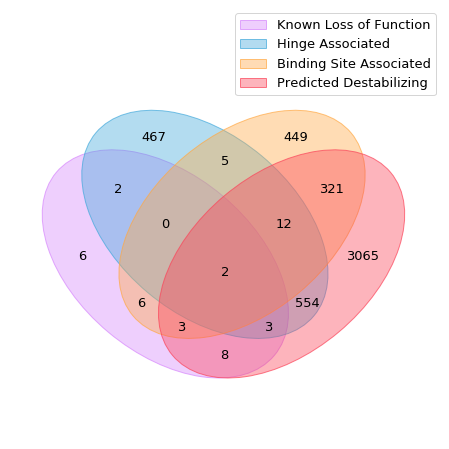

In [9]:
# We have to use the slightly less easy to use python library "venn" for a 4 way venn diagram
from venn import venn
venn(mutationdict, cmap = cmap)
plt.savefig("Figure_5_mutationvenndiagram.pdf")